<a href="https://colab.research.google.com/github/ak2003335/Capstone-Project/blob/main/individual_colab_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive

In [65]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [66]:
path='/content/drive/My Drive/Hotel Bookings.csv'

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [68]:
data=pd.read_csv(path)

In [69]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [70]:
df=pd.DataFrame(data)

In [71]:
df['previous_cancellations']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: previous_cancellations, Length: 119390, dtype: int64

In [72]:
df=pd.DataFrame(data)

hotel cancel vs not canceld

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [74]:
df.loc[df['hotel']=="Resort Hotel"].hotel.count()

40060

In [75]:
df.loc[df['hotel']=="City Hotel"].hotel.count()

79330

In [76]:
40060+79330

119390

In [77]:
df['hotel'].count()

119390

<h1>Canceled vs not canceled include Resort and City</h1>

In [78]:
iscan=df.loc[df['is_canceled']==1].is_canceled.count()

In [79]:
notcan=df.loc[df['is_canceled']==0].is_canceled.count()

In [80]:
print('Total no. of cancel hotel:',iscan,'\nTotal no. of not cancel hotet:',notcan)


Total no. of cancel hotel: 44224 
Total no. of not cancel hotet: 75166


In [81]:
c=np.array(['Cancel','NotCancel'])
d=np.array([iscan,notcan])

<BarContainer object of 2 artists>

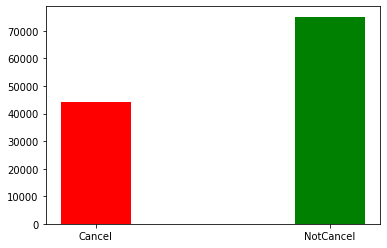

In [82]:
plt.bar(c,d,color=['red','green'],width=0.3)

<h1>City and Resort hotel cancelation</h1>

In [83]:

res=df[(df['is_canceled']==0)&(df['hotel']=="Resort Hotel")].is_canceled.count()
cit=df[(df['is_canceled']==0)&(df['hotel']=="City Hotel")].is_canceled.count()

arr_rc=np.array([res,cit])
arr_label=np.array(['Resort','City'])

Text(0.5, 1.0, 'Hotel Cancellation')

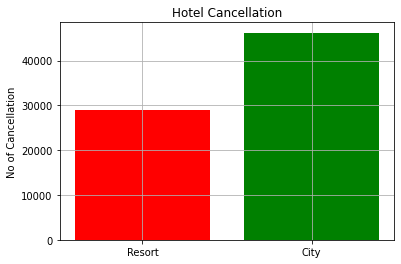

In [84]:
plt.bar(arr_label,arr_rc,color=['red','green'])
plt.grid()
plt.ylabel("No of Cancellation")
plt.title("Hotel Cancellation")

([<matplotlib.patches.Wedge at 0x7fd1dff90d90>,
 [Text(0.38886147309004254, 1.0289736414244257, 'Resort'),
  Text(-0.3888614730900431, -1.0289736414244253, 'City')],
 [Text(0.2121062580491141, 0.5612583498678685, '38.50%'),
  Text(-0.2121062580491144, -0.5612583498678683, '61.50%')])

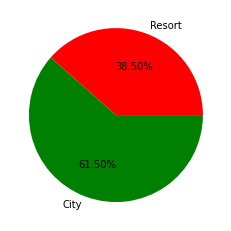

In [85]:
plt.pie(arr_rc,autopct="%1.2f%%",labels=['Resort','City'],colors=['red','green'])

<h1>Number of City and Resort Hotels</h1>

In [86]:

resort=df.loc[df['hotel']=="Resort Hotel"].hotel.count()
city=df.loc[df['hotel']=="City Hotel"].hotel.count()
print(resort,city)


40060 79330


<BarContainer object of 2 artists>

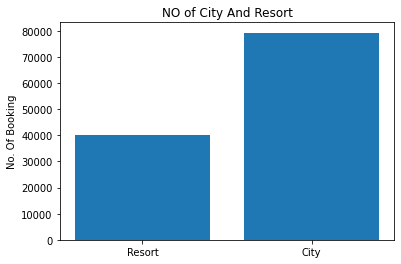

In [87]:
resort_array=np.array(resort)
city_array=np.array(city)
name=np.array(['Resort','City'])
arr_name=np.array([resort_array,city_array])
plt.title("NO of City And Resort")
plt.ylabel("No. Of Booking")
plt.bar(name,arr_name)


<h1>How many people  Reserve hotel in 2016</h1>

In [88]:
month=[]
month_values=[]
for i in df[(df['arrival_date_year']==2016)].arrival_date_month.unique():
  k=df.loc[(df['arrival_date_month']==i) & (df['is_canceled']==1)].arrival_date_month.count()
  month.append(k)
  month_values.append(k)
arry_month=np.array(month)
month_values
total_can=np.array(month_values)


([<matplotlib.patches.Wedge at 0x7fd1dfec1990>,
 [Text(1.090949632164126, 0.1408151273157761, 'July'),
  Text(0.9913271625046136, 0.47672891340944656, 'August'),
  Text(0.7147849543679635, 0.836111517089191, 'September'),
  Text(0.1776942873010318, 1.085552734905393, 'October'),
  Text(-0.5190187596227304, 0.9698554155953776, 'November'),
  Text(-1.0021328777049519, 0.4535743548998249, 'December'),
  Text(-1.0700214224820375, -0.2550571611022066, 'January'),
  Text(-0.6460705560036403, -0.8902768314772362, 'February'),
  Text(0.04046844195629105, -1.0992553412222432, 'March'),
  Text(0.6487870364191876, -0.8882991508351271, 'April'),
  Text(0.9718026552764132, -0.5153635602152262, 'May'),
  Text(1.084433801285736, -0.1843999203605281, 'June')],
 [Text(0.5950634357258868, 0.0768082512631506, '4.1%'),
  Text(0.5407239068206983, 0.260033952768789, '6.1%'),
  Text(0.3898827023825255, 0.456060827503195, '7.1%'),
  Text(0.0969241567096537, 0.5921196735847598, '10.2%'),
  Text(-0.283101141612

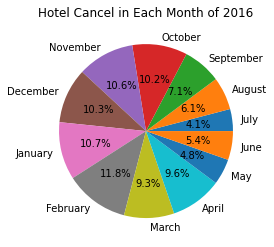

In [89]:
plt.title("Hotel Cancel in Each Month of 2016")
plt.pie(total_can,autopct='%2.1f%%',labels=['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'])



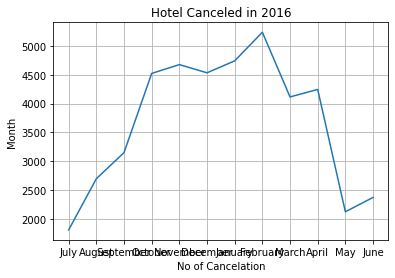

In [90]:
plt.title("Hotel Canceled in 2016")
plt.grid()
plt.xlabel("No of Cancelation")
plt.ylabel("Month")
plt.rcParams['figure.figsize']=(4,4)
ar_mon=np.array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'])
plt.plot(ar_mon,month_values)

<h1>Ratio of children, babies and adults in Hotel Booking</h1>

In [91]:
children=df['children'].count()
babies=df['babies'].count()
adults=df['adults'].count()


In [92]:
arr_of_abc=np.array([adults,babies,children])
xname=np.array(['Adults','Babies','Children'])
print(arr_of_abc)

[119390 119390 119386]


<BarContainer object of 3 artists>

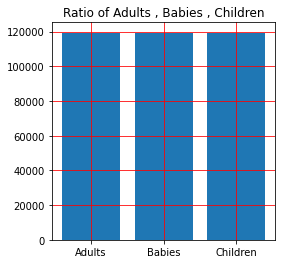

In [93]:
plt.title("Ratio of Adults , Babies , Children")
plt.grid(color="red")
plt.bar(xname,arr_of_abc)

<h1>Guest Arrival in each year</h1>

In [94]:
df.arrival_date_year.unique()


array([2015, 2016, 2017])

In [95]:
year=[]
for i in df.arrival_date_year.unique():
  k=df.loc[df['arrival_date_year']==i].arrival_date_year.count()
  year.append(k)
year



[21996, 56707, 40687]

In [96]:
x=np.array(['2015','2016','2017'])
arr_of_year=np.array(year)

<BarContainer object of 3 artists>

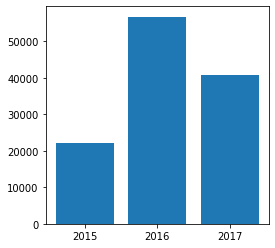

In [97]:
plt.bar(x,arr_of_year)

<H1>Repeated Guests</H1>

Text(0.5, 1.0, 'Yearly Bookings')

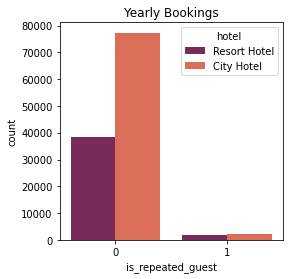

In [98]:
import seaborn as sns

sns.countplot(x= 'is_repeated_guest', data= df, hue= 'hotel',palette='rocket').set_title ('Yearly Bookings')

In [99]:
did_re=df.loc[(df['is_repeated_guest']==0)].is_repeated_guest.count()
no_re=df.loc[df['is_repeated_guest']==1].is_repeated_guest.count()

In [100]:
total_re=np.array([did_re,no_re])

([<matplotlib.patches.Wedge at 0x7fd1dfc3a510>,
 [Text(-1.09447652566627, 0.11009602520295811, 'Not Repeated'),
  Text(1.0944765295317447, -0.11009598677585064, 'Repeated')],
 [Text(-0.5969871958179654, 0.060052377383431686, '96.8%'),
  Text(0.5969871979264061, -0.060052356423191254, '3.2%')])

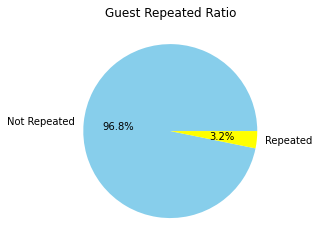

In [101]:
plt.title("Guest Repeated Ratio")
plt.pie(total_re,labels=['Not Repeated','Repeated'],colors=['skyblue','yellow'],autopct='%2.1f%%')

<h1> Highest Booking Year</h1>

In [102]:
year=[2015,2016,2017]
year_co=[]
for i in year:
  y=df[df['arrival_date_year']==i].arrival_date_year.count()
  year_co.append(y)



In [103]:
np.array(year_co)

array([21996, 56707, 40687])

([<matplotlib.patches.Wedge at 0x7fd1dfc048d0>,
 [Text(0.9208339514746371, 0.6017182345679795, '2015'),
  Text(-0.9696175067011981, 0.5194630792448607, '2016'),
  Text(0.527533057139542, -0.965250679163195, '2017')],
 [Text(0.5022730644407111, 0.32820994612798876, '18.4%'),
  Text(-0.5288822763824716, 0.28334349776992396, '47.5%'),
  Text(0.2877453038942956, -0.5265003704526517, '34.1%')])

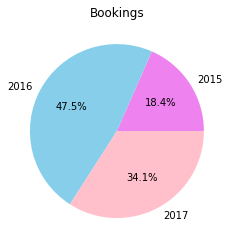

In [104]:
plt.title("Bookings")
plt.pie(year_co,autopct='%2.1f%%',labels=['2015','2016',2017],colors=['Violet','skyblue','pink'])


<BarContainer object of 3 artists>

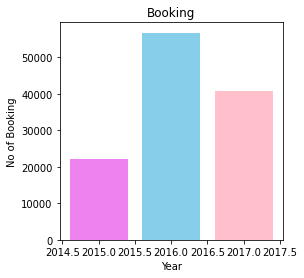

In [105]:
year=[2015,2016,2017]
plt.title("Booking")
plt.xlabel("Year")
plt.ylabel("No of Booking")

plt.bar(year,year_co,color=['Violet','skyblue','pink'])

In [106]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')